In [1]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras import layers
from keras import models
from keras import optimizers
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
class PreFile(object):
    
    def __init__(self,data_dir):
        truncate_path = data_dir + ('%0.2d'%52)
        
        self.image_names = [] # 遍历训练集所有图像的路径，存储在image_names内
        
        for root, sub_folder, file_list in os.walk(data_dir):
            if root < truncate_path:
                self.image_names += [os.path.join(root, file_path) for file_path in file_list]
        
        random.shuffle(self.image_names) # 打乱之后喂进网络训练更准确
        
        # 截取len(FilePath)之后的字符串，以‘/’分割强制转换后得到想要的label
        self.labels = [int(file_name[len(data_dir):].split(os.sep)[0]) for file_name in self.image_names]
    
    def Read_Images(self,img_path):
        img = Image.open(img_path).convert('L')
        return np.array(img)
    
    def get_value_and_label(self,categories):
        value_list = []
        label_list = []
        for i in range (len(self.image_names)):
            files_img_in_array = self.Read_Images(self.image_names[i])
            files_img_in_array = np.asarray(files_img_in_array)/255.0
            files_img_in_array = files_img_in_array.reshape(30,25,1)
            value_list.append(files_img_in_array)
        print(i)
            
        value_list = np.asarray(value_list)
        label_list = np.asarray(self.labels)
        
        label_list = np_utils.to_categorical(label_list,categories)
        
        return value_list,label_list

to_categorical(y, num_classes=None, dtype='float32')

将整型标签转为onehot。y为int数组，num_classes为标签类别总数，大于max(y)（标签从0开始的）。

In [3]:
class Training(object):
    
    def __init__(self,batch_size,number_batch,categories):
        self.batch_size = batch_size
        self.number_batch = number_batch
        self.categories = categories
    
    def build_net(self):
        model = models.Sequential()
        #CNN Layer 
        model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(30,25,1)))
        model.add(layers.MaxPool2D((2,2)))
        model.add(layers.Conv2D(64,(3,3),activation='relu'))
        model.add(layers.MaxPool2D((2,2)))
        model.add(layers.Conv2D(128,(3,3),activation='relu'))
        model.add(layers.MaxPool2D((2,2)))

        #Fully connected Layer 
        model.add(layers.Flatten())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(512,activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(256,activation='relu'))
        model.add(layers.Dropout(0.2))
        model.add(layers.Dense(self.categories,activation='softmax'))

    # Define Optimizer
        adam = Adam(lr = 0.001)
    #Compile the model
        model.compile(optimizer=adam,
                      loss="categorical_crossentropy",
                      metrics=['accuracy']
                      )
    # Fire up the network
        train_log = model.fit(
            train_img_list,
            train_label_list,
            epochs=self.number_batch,
            batch_size=self.batch_size,
            verbose=1,
            #validation_data=(test_img_list,test_label_list)
        )
        model.save('./words_recognize.h5')
        #score = model.evaluate(test_img_list,test_label_list)
        #print("loss",score[0])
        #print("accu",score[1])
        #SAVE your work -model
        model.save('./words_recognize.h5')
        
        # 绘制los/acc曲线
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(np.arange(0, self.number_batch), train_log.history["loss"], label="train_loss")
        #plt.plot(np.arange(0, self.number_batch), train_log.history["val_loss"], label="val_loss")
        plt.plot(np.arange(0, self.number_batch), train_log.history["acc"], label="train_acc")
        #plt.plot(np.arange(0, self.number_batch), train_log.history["val_acc"], label="val_acc")
        plt.title("Training Loss and Accuracy on sar classifier")
        plt.xlabel("Epoch")
        plt.ylabel("Loss/Accuracy")
        plt.legend(loc="upper right")
        plt.show()

23818
Epoch 1/30
23819/23819 [==============================] - 6s 264us/step - loss: 1.6627 - acc: 0.5192
Epoch 2/30
23819/23819 [==============================] - 3s 130us/step - loss: 0.5413 - acc: 0.8179
Epoch 3/30
23819/23819 [==============================] - 3s 130us/step - loss: 0.3693 - acc: 0.8729
Epoch 4/30
23819/23819 [==============================] - 3s 130us/step - loss: 0.2894 - acc: 0.8973
Epoch 5/30
23819/23819 [==============================] - 3s 131us/step - loss: 0.2454 - acc: 0.9105
Epoch 6/30
23819/23819 [==============================] - 3s 133us/step - loss: 0.2144 - acc: 0.9238
Epoch 7/30
23819/23819 [==============================] - 3s 134us/step - loss: 0.1891 - acc: 0.9317
Epoch 8/30
23819/23819 [==============================] - 3s 135us/step - loss: 0.1763 - acc: 0.9336
Epoch 9/30
23819/23819 [==============================] - 3s 134us/step - loss: 0.1584 - acc: 0.9411
Epoch 10/30
23819/23819 [==============================] - 3s 136us/step - loss: 0.14

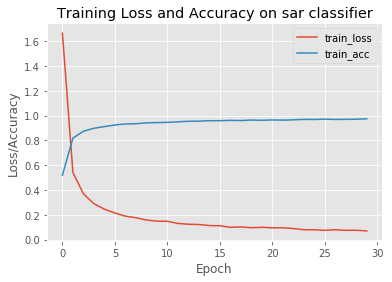

In [4]:
if __name__ == "__main__":
    
    train_prefile = PreFile(data_dir='./dataset/train/')
    train_img_list,train_label_list = train_prefile.get_value_and_label(categories=55)
    
    #test_prefile = PreFile(data_dir='./dataset/test/')
    #test_img_list,test_label_list = test_prefile.get_value_and_label(categories=55)
    
    train = Training(batch_size=64,number_batch=30,categories=55)
    train.build_net()



In [11]:
print(train_img_list.shape)

(9152, 30, 25, 1)
